In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Load the pre-downloaded Fashion-MNIST npz
data_path = Path("data") / "fashion_mnist.npz"
with np.load(data_path) as d:
    keys = d.keys() # dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
    x_train_full = d["x_train"]  # (60000, 28, 28), uint8
    y_train_full = d["y_train"]  # (60000,)
    x_test_full  = d["x_test"]   # (10000, 28, 28), uint8
    y_test_full  = d["y_test"] 
    

# Create subsets: 50,000 for training, 10,000 for validation (from 60,000 train)
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

x_valid = x_train_full[50000:60000]
y_valid = y_train_full[50000:60000]

x_test = x_test_full
y_test = y_test_full

# Number of classes (should be 10 for Fashion-MNIST)
num_classes = int(np.unique(y_train).size)
print("Loaded:")
print("Keys:", keys)
print("  x_train:", x_train.shape, x_train.dtype) # (50000, 28, 28)
print("  y_train:", y_train.shape, y_train.dtype) # (50000,)
print("  x_valid :", x_valid.shape, x_valid.dtype) # (10000, 28, 28)
print("  y_valid :", y_valid.shape, y_valid.dtype) # (10000,)
print("  x_test :", x_test.shape, x_test.dtype) # (10000, 28, 28)
print("  y_test :", y_test.shape, y_test.dtype) # (10000,)
print("Number of classes:", num_classes)  # expected 10


""" # Simple NumPy "DataLoader" for one batch
def get_batch(x, y, batch_size=64, shuffle=False, seed=None):
    n = x.shape[0]
    if shuffle:
        rng = np.random.default_rng(seed)
        idx = rng.permutation(n)[:batch_size]
    else:
        idx = np.arange(batch_size)
    xb = x[idx]
    yb = y[idx]
    # Add channel dimension to match (N, 1, 28, 28)
    xb = xb[:, None, :, :]
    return xb, yb

# Extract one batch from each dataset
x_train_batch, targets_train = get_batch(x_train, y_train, batch_size=64)
x_valid_batch, targets_valid = get_batch(x_valid, y_valid, batch_size=64)
x_test_batch, targets_test = get_batch(x_test, y_test, batch_size=64)

print("\nInformation on dataset (NumPy only)")
print("Shape of x_train:", x_train_batch.shape)      # (64, 1, 28, 28) where 64 is batch size, 1 is number of channels, 28x28 is image size ( height x width)
print("Shape of targets_train:", targets_train.shape)  # (64,)
print("Shape of x_valid:", x_valid_batch.shape)      # (64, 1, 28, 28)
print("Shape of targets_valid:", targets_valid.shape)  # (64,)
print("Shape of x_test:", x_test_batch.shape)        # (64, 1, 28, 28)
print("Shape of targets_test:", targets_test.shape)    # (64,)
print("Number of classes:", num_classes)             # expected 10 """

Loaded:
Keys: KeysView(NpzFile 'object' with keys: x_train, y_train, x_test, y_test)
  x_train: (50000, 28, 28) uint8
  y_train: (50000,) uint8
  x_valid : (10000, 28, 28) uint8
  y_valid : (10000,) uint8
  x_test : (10000, 28, 28) uint8
  y_test : (10000,) uint8
Number of classes: 10


' # Simple NumPy "DataLoader" for one batch\ndef get_batch(x, y, batch_size=64, shuffle=False, seed=None):\n    n = x.shape[0]\n    if shuffle:\n        rng = np.random.default_rng(seed)\n        idx = rng.permutation(n)[:batch_size]\n    else:\n        idx = np.arange(batch_size)\n    xb = x[idx]\n    yb = y[idx]\n    # Add channel dimension to match (N, 1, 28, 28)\n    xb = xb[:, None, :, :]\n    return xb, yb\n\n# Extract one batch from each dataset\nx_train_batch, targets_train = get_batch(x_train, y_train, batch_size=64)\nx_valid_batch, targets_valid = get_batch(x_valid, y_valid, batch_size=64)\nx_test_batch, targets_test = get_batch(x_test, y_test, batch_size=64)\n\nprint("\nInformation on dataset (NumPy only)")\nprint("Shape of x_train:", x_train_batch.shape)      # (64, 1, 28, 28) where 64 is batch size, 1 is number of channels, 28x28 is image size ( height x width)\nprint("Shape of targets_train:", targets_train.shape)  # (64,)\nprint("Shape of x_valid:", x_valid_batch.shape) 

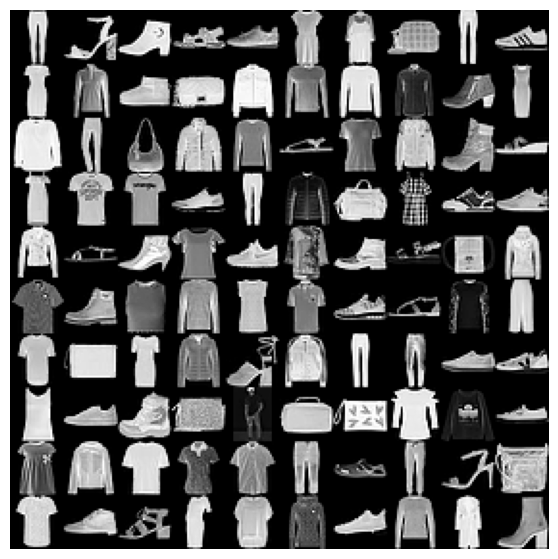

images shape: (100, 28, 28)
labels shape: (100,)


In [4]:
# Visualize some examples from the training set first 100 images
n = x_train.shape[0]
idx = np.random.permutation(n)[:100]

images = x_train[idx]   # (100, 28, 28)
labels = y_train[idx]   # (100,)
# Plot a few MNIST examples

# Build a 10x10 grid using NumPy only
rows, columns = 10, 10
heighth, width = images.shape[1], images.shape[2]  # 28, 28
grid = np.zeros((rows * heighth, columns * width), dtype=images.dtype)

for i in range(rows * columns):
    r = i // columns
    c = i % columns
    grid[r*heighth:(r+1)*heighth, c*width:(c+1)*width] = images[i]

# Plot the grid
plt.figure(figsize=(7, 7))
plt.imshow(grid, cmap="gray")
plt.axis("off")
plt.show()

print("images shape:", images.shape)
print("labels shape:", labels.shape)

Input dim: 784
Epoch 001 | train loss: 0.5931, train acc: 0.7867 | valid loss: 0.4760, valid acc: 0.8299
Epoch 001 | train loss: 0.5931, train acc: 0.7867 | valid loss: 0.4760, valid acc: 0.8299
Epoch 002 | train loss: 0.4176, train acc: 0.8477 | valid loss: 0.4054, valid acc: 0.8539
Epoch 002 | train loss: 0.4176, train acc: 0.8477 | valid loss: 0.4054, valid acc: 0.8539
Epoch 003 | train loss: 0.3764, train acc: 0.8613 | valid loss: 0.3937, valid acc: 0.8523
Epoch 003 | train loss: 0.3764, train acc: 0.8613 | valid loss: 0.3937, valid acc: 0.8523
Epoch 004 | train loss: 0.3496, train acc: 0.8721 | valid loss: 0.3627, valid acc: 0.8705
Epoch 004 | train loss: 0.3496, train acc: 0.8721 | valid loss: 0.3627, valid acc: 0.8705
Epoch 005 | train loss: 0.3314, train acc: 0.8782 | valid loss: 0.3995, valid acc: 0.8522
Epoch 005 | train loss: 0.3314, train acc: 0.8782 | valid loss: 0.3995, valid acc: 0.8522
Epoch 006 | train loss: 0.3167, train acc: 0.8828 | valid loss: 0.3403, valid acc: 0.

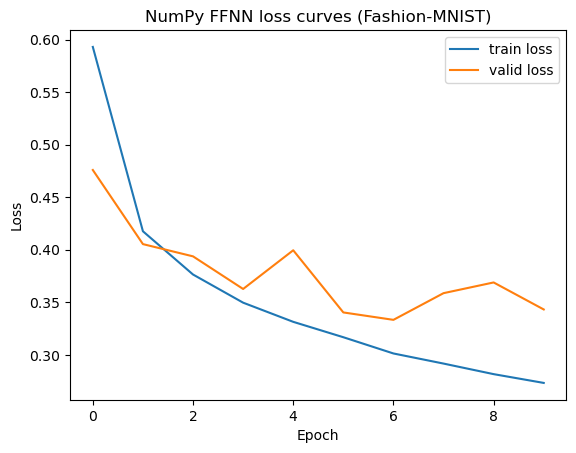

Test accuracy (NumPy FFNN): 0.8662
Confusion matrix (rows=true, cols=pred):
[[844   3   8  47   6   3  73   0  16   0]
 [  1 968   0  23   5   0   1   0   2   0]
 [ 14   1 692  15 205   0  58   1  12   2]
 [ 15   8   8 891  53   1  20   0   4   0]
 [  0   1  54  21 898   0  25   0   1   0]
 [  0   0   0   1   0 946   0  22   1  30]
 [130   1  68  38 176   0 568   0  19   0]
 [  0   0   0   0   0  18   0 897   1  84]
 [  3   2   0   4   6   2   1   5 976   1]
 [  1   0   0   0   0   3   0  14   0 982]]


In [ ]:
"""
Define and train a simple feed-forward neural network using only NumPy.

Features:
- Configurable: num_hidden_layers, n_hidden_units, learning_rate, batch_size,
  l2_coeff, weights_init, activation (relu/tanh/sigmoid), loss (mse/cross_entropy),
  optimizer (currently: "sgd").
- Implements forward pass, backward pass, mini-batch gradient descent,
  and evaluation (accuracy, loss curves, confusion matrix).
"""

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

# ============================================================
# Utilities
# ============================================================

def one_hot(y: np.ndarray, num_classes: int) -> np.ndarray:
    """Convert integer labels to one-hot vectors."""
    y = y.astype(int)
    oh = np.zeros((y.size, num_classes), dtype=np.float32)
    oh[np.arange(y.size), y] = 1.0
    return oh


def accuracy(pred: np.ndarray, target: np.ndarray) -> float:
    """Compute classification accuracy from probabilities/logits and labels."""
    y_pred = np.argmax(pred, axis=1)
    return float((y_pred == target).mean())


# ============================================================
# Activation functions
# ============================================================

class Activation:
    def __init__(self, name: str):
        name = name.lower()
        if name not in {"relu", "tanh", "sigmoid"}:
            raise ValueError(f"Unsupported activation: {name}")
        self.name = name

    def __call__(self, x: np.ndarray) -> np.ndarray:
        if self.name == "relu":
            return np.maximum(0, x)
        if self.name == "tanh":
            return np.tanh(x)
            #return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  #TODO : for ckecking code 
        if self.name == "sigmoid":
            return 1.0 / (1.0 + np.exp(-x))
        raise RuntimeError

    def derivative(self, x: np.ndarray) -> np.ndarray:
        if self.name == "relu":
           # return (x > 0).astype(np.float32)
            return np.where(x > 0, 1.0, 0.0).astype(np.float32) #TODO : for checking 
        if self.name == "tanh":
            t = np.tanh(x)
            #t= (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  #TODO : for ckecking code
            return 1.0 - t ** 2
        if self.name == "sigmoid":
            s = 1.0 / (1.0 + np.exp(-x))
            return s * (1.0 - s)
        raise RuntimeError


# ============================================================
# Loss functions
# ============================================================

class Loss:
    def __init__(self, name: str):
        name = name.lower()
        if name not in {"mse", "cross_entropy"}:
            raise ValueError(f"Unsupported loss: {name}")
        self.name = name

    def __call__(self, y_pred: np.ndarray, y_true: np.ndarray) -> float:
        if self.name == "mse":
            return float(np.mean((y_true - y_pred) ** 2))
        if self.name == "cross_entropy":
            # y_true is one-hot targets
            # y_pred is probabilities
            eps = 1e-12
            y_pred_clipped = np.clip(y_pred, eps, 1.0 - eps)
            return float(-np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1)))
        raise RuntimeError

    def derivative(self, y_pred: np.ndarray, y_true: np.ndarray) -> np.ndarray:
        if self.name == "mse":
            return 2.0 * (y_pred - y_true) / y_pred.shape[0]
        if self.name == "cross_entropy":
            return (y_pred - y_true) / y_pred.shape[0]
        raise RuntimeError


# ============================================================
# Weight initialization
# ============================================================

def init_weights(shape: Tuple[int, int], method: str) -> np.ndarray:
    """Initialize weights with zeros / Xavier / He / small normal."""
    method = method.lower()
    fan_in, fan_out = shape
    # Zeros initialization (not recommended)
    if method == "zeros": #TODO remove
        return np.zeros(shape, dtype=np.float32)
    # Hidden layers with tanh / sigmoid: use Xavier (Glorot)
    if method == "xavier": 
        limit = np.sqrt(6.0 / (fan_in + fan_out))
        return np.random.uniform(-limit, limit, size=shape).astype(np.float32)
    # Hidden layers with ReLU
    if method == "he": #TODO checking
        return (np.random.randn(fan_in, fan_out) * np.sqrt(2.0 / fan_in)).astype(np.float32)

    # default: small normal
    return (0.01 * np.random.randn(fan_in, fan_out)).astype(np.float32)


# ============================================================
# Feed-Forward Neural Network (FFNN)
# ============================================================

class FFNN:
    def __init__(
        self,
        input_dim: int,
        num_classes: int,
        num_hidden_layers: int = 1,
        n_hidden_units: int = 128,
        activation: str = "relu",
        loss: str = "cross_entropy",
        learning_rate: float = 0.01,
        l2_coeff: float = 0.0,
        weights_init: str = "he",
        optimizer: str = "sgd",
    ):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.num_hidden_layers = num_hidden_layers
        self.n_hidden_units = n_hidden_units
        self.act = Activation(activation)
        self.loss_fn = Loss(loss)
        self.lr = learning_rate
        self.l2 = l2_coeff
        self.weights_init = weights_init

        optimizer = optimizer.lower()
        if optimizer not in {"sgd"}:  # easy to extend with "adam" later
            raise ValueError(f"Unsupported optimizer: {optimizer}")
        self.optimizer = optimizer

        # List of weight matrices and biases
        self.W: List[np.ndarray] = []
        self.b: List[np.ndarray] = []

        # Input -> hidden layers
        prev_dim = input_dim
        for _ in range(num_hidden_layers):
            self.W.append(init_weights((prev_dim, n_hidden_units), weights_init))
            self.b.append(np.zeros((1, n_hidden_units), dtype=np.float32))
            prev_dim = n_hidden_units

        # Last hidden -> output
        self.W.append(init_weights((prev_dim, num_classes), weights_init))
        self.b.append(np.zeros((1, num_classes), dtype=np.float32))

    @staticmethod
    def _softmax(z: np.ndarray) -> np.ndarray:
        z_shifted = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shifted)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, x: np.ndarray):
        """Forward pass; returns (pre_activations, activations)."""
        a = x
        pre_acts: List[np.ndarray] = []
        acts: List[np.ndarray] = [x]

        # Hidden layers
        for i in range(self.num_hidden_layers):
            z = a @ self.W[i] + self.b[i]
            a = self.act(z)
            pre_acts.append(z)
            acts.append(a)

        # Output layer
        z_out = a @ self.W[-1] + self.b[-1]
        pre_acts.append(z_out)
        y_pred = self._softmax(z_out)
        acts.append(y_pred)

        return pre_acts, acts

    def compute_loss(self, y_pred: np.ndarray, y_true_oh: np.ndarray) -> float:
        """Loss + optional L2 regularization."""
        base = self.loss_fn(y_pred, y_true_oh)
        if self.l2 > 0.0:
            reg = sum(np.sum(W ** 2) for W in self.W)
            base += self.l2 * reg / (2.0 * y_true_oh.shape[0])
        return base

    def backward(self, pre_acts, acts, y_true_oh):
        """Backward pass; returns gradients (dW, db)."""
        dW = [np.zeros_like(W) for W in self.W]
        db = [np.zeros_like(b) for b in self.b]

        # Output layer gradient (softmax + cross-entropy)
        y_pred = acts[-1]
        delta = (y_pred - y_true_oh) / y_true_oh.shape[0]  # (N, C)

        # Last layer
        a_prev = acts[-2]
        dW[-1] = a_prev.T @ delta + self.l2 * self.W[-1]
        db[-1] = np.sum(delta, axis=0, keepdims=True)

        # Hidden layers backwards
        for i in range(self.num_hidden_layers - 1, -1, -1):
            z = pre_acts[i]
            da = delta @ self.W[i + 1].T
            dz = da * self.act.derivative(z)
            a_prev = acts[i]
            dW[i] = a_prev.T @ dz + self.l2 * self.W[i]
            db[i] = np.sum(dz, axis=0, keepdims=True)
            delta = dz

        return dW, db

    def step(self, dW, db):
        """Optimizer step (currently SGD)."""
        if self.optimizer == "sgd":
            # Standard stochastic gradient descent: theta <- theta - lr * grad
            for i in range(len(self.W)):
                self.W[i] -= self.lr * dW[i]
                self.b[i] -= self.lr * db[i]
        else:
            raise RuntimeError(f"Optimizer '{self.optimizer}' not implemented.")

    def predict_proba(self, x: np.ndarray) -> np.ndarray:
        _, acts = self.forward(x)
        return acts[-1]

    def predict(self, x: np.ndarray) -> np.ndarray:
        probs = self.predict_proba(x)
        return np.argmax(probs, axis=1)


# ============================================================
# Training helpers
# ============================================================

def iterate_minibatches(
    X: np.ndarray, y: np.ndarray, batch_size: int, shuffle: bool = True
):
    """Yield mini-batches of (X_batch, y_batch)."""
    N = X.shape[0]
    indices = np.arange(N)
    if shuffle:
        np.random.shuffle(indices)
    for start in range(0, N, batch_size):
        end = start + batch_size
        if end > N:
            break
        batch_idx = indices[start:end]
        yield X[batch_idx], y[batch_idx]


def train_ffnn(
    model: FFNN,
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_valid: Optional[np.ndarray] = None,
    y_valid: Optional[np.ndarray] = None,
    num_epochs: int = 10,
    batch_size: int = 64,
):
    """Train FFNN with mini-batch gradient descent."""
    num_classes = model.num_classes
    history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}

    for epoch in range(1, num_epochs + 1):
        train_losses = []
        train_accs = []

        for Xb, yb in iterate_minibatches(X_train, y_train, batch_size, shuffle=True):
            Xb_flat = Xb.reshape(Xb.shape[0], -1)
            yb_oh = one_hot(yb, num_classes)

            pre_acts, acts = model.forward(Xb_flat)
            y_pred = acts[-1]
            loss_val = model.compute_loss(y_pred, yb_oh)

            dW, db = model.backward(pre_acts, acts, yb_oh)
            model.step(dW, db)

            train_losses.append(loss_val)
            train_accs.append(accuracy(y_pred, yb))

        avg_train_loss = float(np.mean(train_losses))
        avg_train_acc = float(np.mean(train_accs))
        history["train_loss"].append(avg_train_loss)
        history["train_acc"].append(avg_train_acc)

        # Validation
        if X_valid is not None and y_valid is not None:
            Xv_flat = X_valid.reshape(X_valid.shape[0], -1)
            yv_oh = one_hot(y_valid, num_classes)
            yv_pred = model.predict_proba(Xv_flat)
            val_loss = model.compute_loss(yv_pred, yv_oh)
            val_acc = accuracy(yv_pred, y_valid)
        else:
            val_loss = np.nan
            val_acc = np.nan

        history["valid_loss"].append(float(val_loss))
        history["valid_acc"].append(float(val_acc))

        print(
            f"Epoch {epoch:03d} | "
            f"train loss: {avg_train_loss:.4f}, train acc: {avg_train_acc:.4f} | "
            f"valid loss: {val_loss:.4f}, valid acc: {val_acc:.4f}"
        )


    return history


# ============================================================
# Train & evaluate on Fashion-MNIST
# ============================================================

# Use all training/validation (you can slice to smaller subsets if needed)
X_train_np = x_train.astype(np.float32) / 255.0
y_train_np = y_train
X_valid_np = x_valid.astype(np.float32) / 255.0
y_valid_np = y_valid

#input_dim = 28 * 28
input_dim=X_train_np.shape[1]*X_train_np.shape[2]
print("Input dim:", input_dim)
num_classes = int(np.unique(y_train_np).size)

ffnn = FFNN(
    input_dim=input_dim,
    num_classes=num_classes,
    num_hidden_layers=2,
    n_hidden_units=128,
    activation="relu",
    loss="cross_entropy",
    learning_rate=0.1,
    l2_coeff=1e-4,
    weights_init="he",
    optimizer="sgd",
)

history = train_ffnn(
    ffnn,
    X_train=X_train_np,
    y_train=y_train_np,
    X_valid=X_valid_np,
    y_valid=y_valid_np,
    num_epochs=10,
    batch_size=64
)

# Loss curves
plt.figure()
plt.plot(history["train_loss"], label="train loss")
plt.plot(history["valid_loss"], label="valid loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("NumPy FFNN loss curves (Fashion-MNIST)")
plt.legend()
plt.show()

# Test evaluation
X_test_np = x_test.astype(np.float32) / 255.0
X_test_flat = X_test_np.reshape(X_test_np.shape[0], -1)
y_test_proba = ffnn.predict_proba(X_test_flat)
test_acc = accuracy(y_test_proba, y_test)
print(f"Test accuracy (NumPy FFNN): {test_acc:.4f}")

# Confusion matrix
num_classes = int(np.unique(y_test).size)
y_pred_labels = np.argmax(y_test_proba, axis=1)
conf_mat = np.zeros((num_classes, num_classes), dtype=int)
for yt, yp in zip(y_test, y_pred_labels):
    conf_mat[int(yt), int(yp)] += 1

print("Confusion matrix (rows=true, cols=pred):")
print(conf_mat)
